# Introduction to Factor Analysis

## Psychometrics

<img src='../images/chapter1 2.jpeg' />


## Learning Objectives

Unidimensional exploratory factor analysis (EFA) explores the 

<img src='../images/chapter1 3.jpeg' />


## Factor Analysis' Relationship to Other Analyses

<img src='../images/chapter1 4.jpeg' />


## Types of Factor Analysis

- **EFA** is used during development as an initial survey of how different factors affect an item of interest.
- **CFA** is used to validate a measure after development.

<img src='../images/chapter1 5.jpeg' />


## Package

Package: The psych package
- Developed by William Revelle.
- More info at [The Personality Project](http://personality-project.org/r/psych/)

In [1]:
library(psych)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


## Dataset
The `gcbs` dataset: Generic Conspiracist Beliefs Survey
- Take the assessment at [Open Source Psychometrics Project](https://openpsychometrics.org/tests/GCBS/)
- Full test is 75 items measuring five conspiracist facets



In [2]:
# Load GCBS Dataset
url <- "https://assets.datacamp.com/production/repositories/2136/datasets/869615371e66021e97829feb7e19e38037ed0c14/GCBS_data.rds"
gcbs <- readRDS(gzcon(url(url)))

In [3]:
str(gcbs)

'data.frame':	2495 obs. of  15 variables:
 $ Q1 : int  5 5 2 5 5 1 4 5 1 1 ...
 $ Q2 : int  5 5 4 4 4 1 3 4 1 2 ...
 $ Q3 : int  3 5 1 1 1 1 3 3 1 1 ...
 $ Q4 : int  5 5 2 2 4 1 3 3 1 1 ...
 $ Q5 : int  5 5 2 4 4 1 4 4 1 1 ...
 $ Q6 : int  5 3 2 5 5 1 3 5 1 5 ...
 $ Q7 : int  5 5 4 4 4 1 3 5 1 1 ...
 $ Q8 : int  3 5 2 1 3 1 4 5 1 1 ...
 $ Q9 : int  4 1 2 4 1 1 2 5 1 1 ...
 $ Q10: int  5 4 4 5 5 1 3 5 1 4 ...
 $ Q11: int  5 4 2 5 5 1 3 5 1 1 ...
 $ Q12: int  5 5 4 5 5 1 2 5 1 1 ...
 $ Q13: int  3 4 0 1 3 1 2 3 1 1 ...
 $ Q14: int  5 4 2 4 5 1 3 4 1 1 ...
 $ Q15: int  5 5 4 5 5 1 4 5 1 5 ...


## Item types
- Government malfeasance (GM)
- Extraterrestrial coverup (ET)
- Malevolent global conspiracies (MG)
- Personal wellbeing (PW)
- Control of information (CI)
More information in [Brotherton, French, & Pickering (2013)](https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00279/full)

<img src='../images/chapter1 9.jpeg' />

In chapter 1, we will ignore the 5 lower-order factors and instead use a single-factor EFA to estimate each item's relationship to our outcome of interest: conspiracist belief.

In [4]:
# Conduct a single-factor EFA
EFA_model <- fa(gcbs)

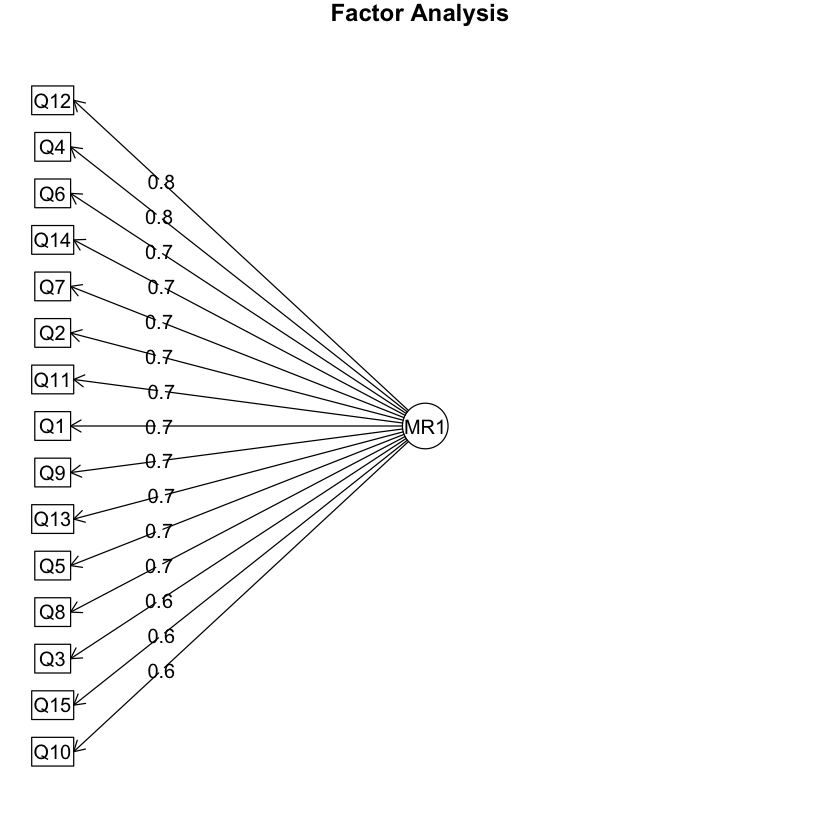

In [5]:
# Display Factor Analysis Diagram
par(bg='white')
fa.diagram(EFA_model)

In [6]:
EFA_model$loadings


Loadings:
    MR1  
Q1  0.703
Q2  0.719
Q3  0.638
Q4  0.770
Q5  0.672
Q6  0.746
Q7  0.734
Q8  0.654
Q9  0.695
Q10 0.565
Q11 0.719
Q12 0.786
Q13 0.679
Q14 0.743
Q15 0.574

                 MR1
SS loadings    7.267
Proportion Var 0.484

In [7]:
# Take a look at the first few lines of the response data and their corresponding sum scores
head(gcbs)

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,5,3,5,5,5,5,3,4,5,5,5,3,5,5
5,5,5,5,5,3,5,5,1,4,4,5,4,4,5
2,4,1,2,2,2,4,2,2,4,2,4,0,2,4
5,4,1,2,4,5,4,1,4,5,5,5,1,4,5
5,4,1,4,4,5,4,3,1,5,5,5,3,5,5
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
rowSums(head(gcbs))

1  2  3  4  5  6 
68 65 37 55 59 15

In [9]:
# Then look at the first few lines of individuals' factor scores
head(EFA_model$scores)



MR1
1.5614675
1.3432026
-0.3960355
0.7478868
1.0435203
-1.7290812


In [10]:
# To get a feel for how the factor scores are distributed, look 
# at their summary statistics and density plot.
summary(EFA_model$scores)


      MR1           
 Min.   :-1.854703  
 1st Qu.:-0.783260  
 Median :-0.001971  
 Mean   : 0.000000  
 3rd Qu.: 0.728568  
 Max.   : 1.949580  

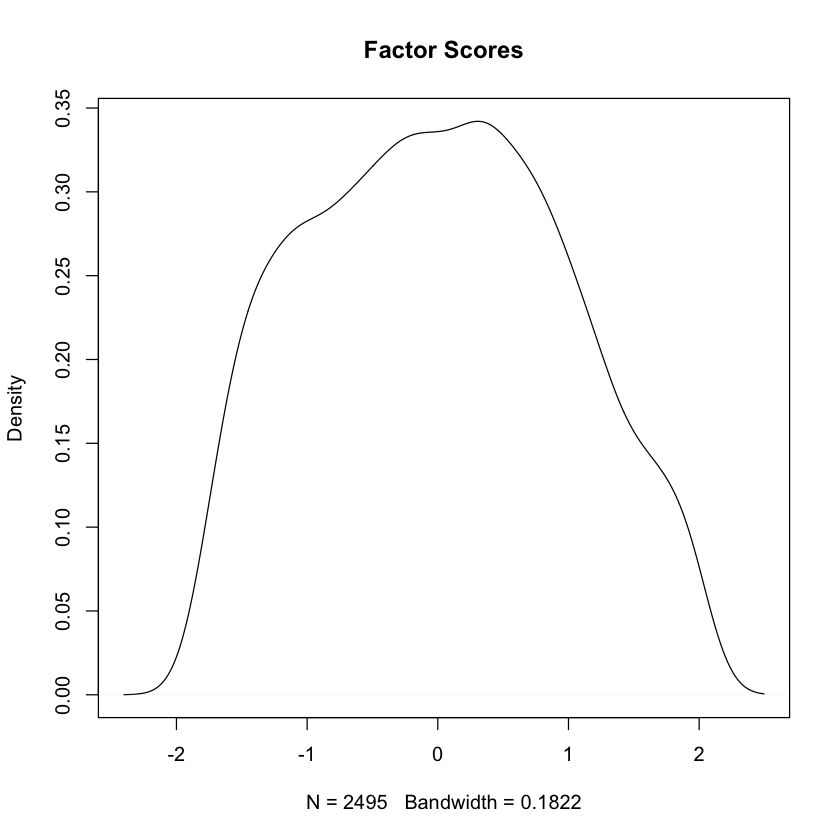

In [11]:
par(bg = "white")
plot(density(EFA_model$scores, na.rm = TRUE), 
    main = "Factor Scores")

# Development Process


  


## 1. Develop items for your measure

Write questions for the items you want to measure. Always write more items than you think you might need since they won't all perform as well as you'd like.

## 2. Collect pilot data from a representative sample

This data will be used to examine your measure and see how it is functioning before you use it in production.


## 3. Check out what that dataset looks like

Use 5 number summaries and distribution visualizations (histograms, boxplots, swarmplots, etc) to get a sense for your data.

In [12]:
describe(gcbs)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Q1,1,2495,3.472545,1.455552,4,3.591387,1.4826,0,5,5,-0.546510460,-1.1036577,0.02914020
Q2,2,2495,2.963527,1.494669,3,2.960941,1.4826,0,5,5,-0.008310023,-1.4002635,0.02992331
Q3,3,2495,2.046894,1.387236,1,1.818728,0.0000,0,5,5,0.981805700,-0.4442639,0.02777251
Q4,4,2495,2.636072,1.451371,2,2.548322,1.4826,0,5,5,0.262457451,-1.3376479,0.02905649
Q5,5,2495,3.254108,1.471855,4,3.322484,1.4826,0,5,5,-0.347396087,-1.2685987,0.02946658
Q6,6,2495,3.108617,1.506676,3,3.138207,1.4826,0,5,5,-0.165115915,-1.4172391,0.03016371
Q7,7,2495,2.666934,1.509954,2,2.587381,1.4826,0,5,5,0.283472211,-1.3907382,0.03022932
Q8,8,2495,2.450501,1.569256,2,2.318478,1.4826,0,5,5,0.513338904,-1.2964184,0.03141656
Q9,9,2495,2.232866,1.419266,2,2.046570,1.4826,0,5,5,0.756774766,-0.8199821,0.02841375


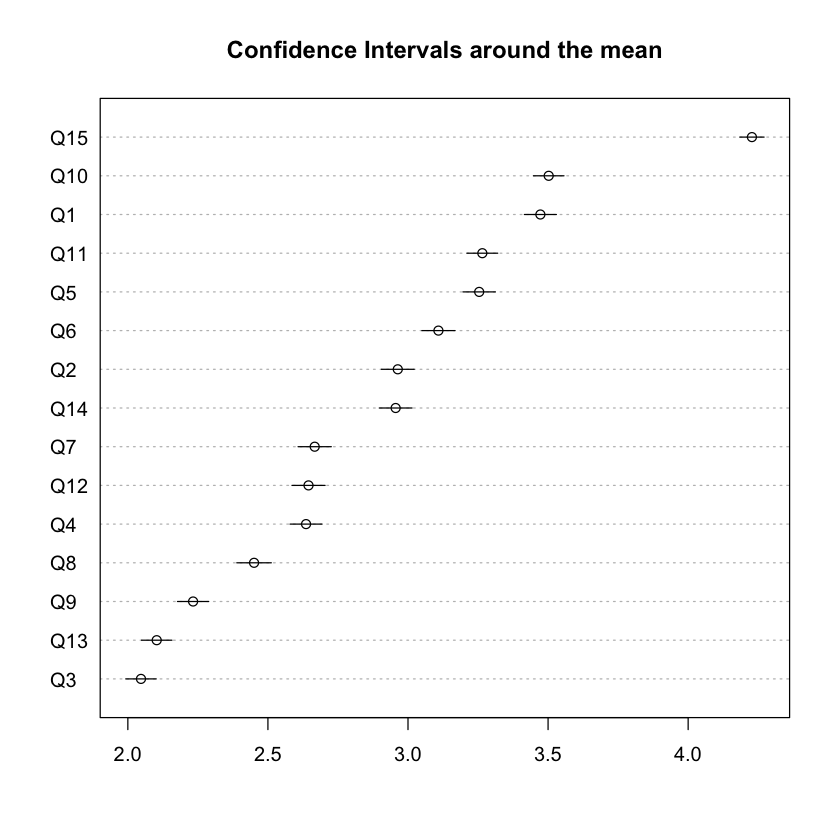

In [13]:
par(bg='white')
error.dots(gcbs)

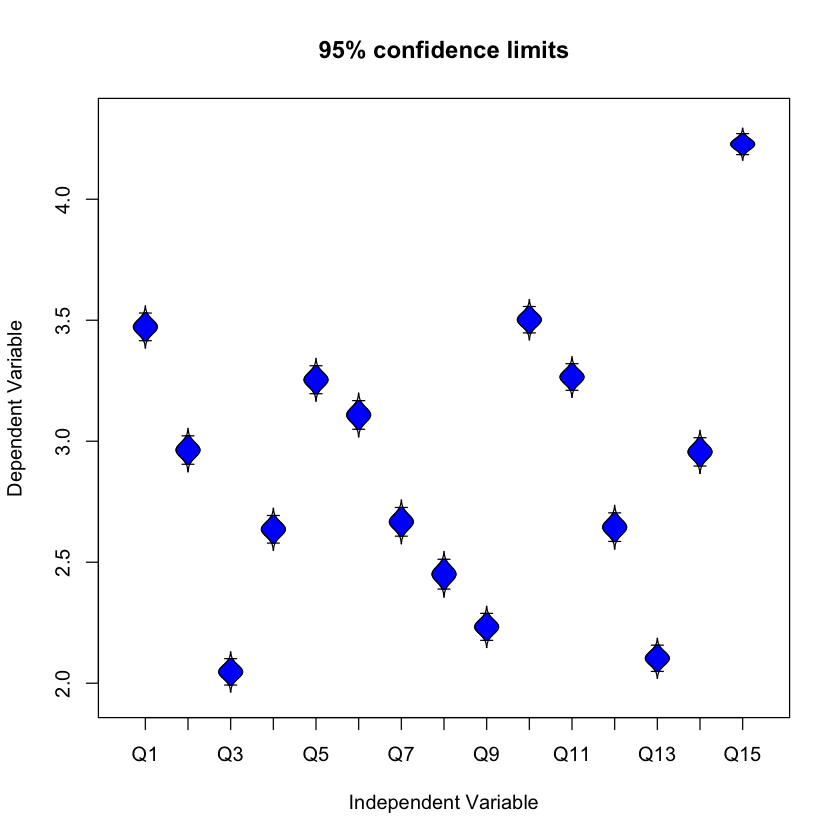

In [14]:
# Graphical representation of error
par(bg='white')
error.bars(gcbs)

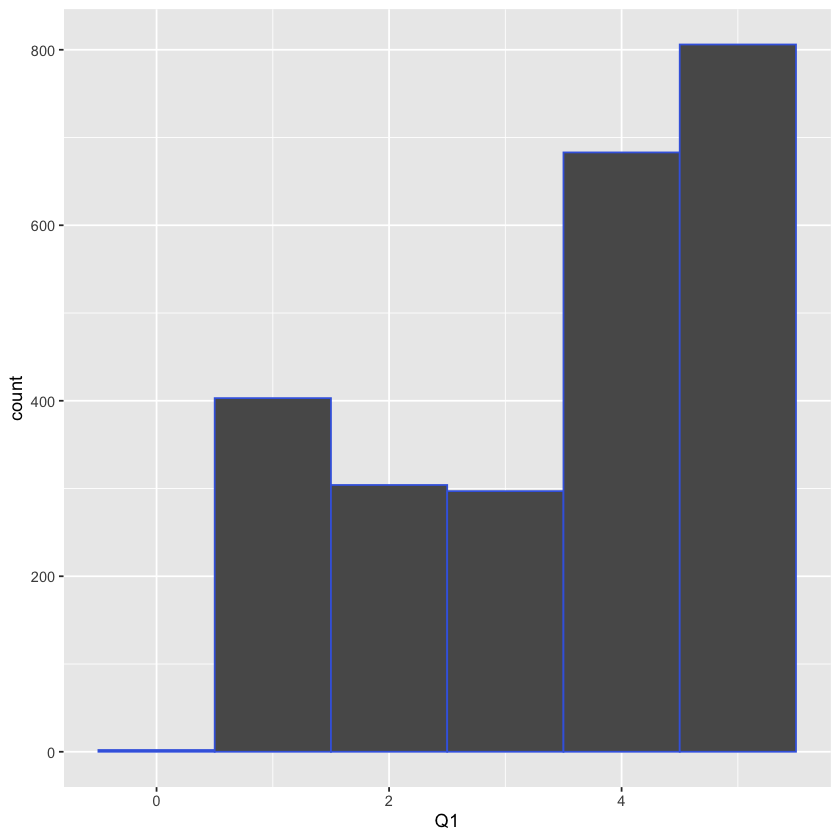

In [15]:
ggplot(gcbs,
      aes(x=Q1)) +
geom_histogram(binwidth=1, color='royalblue')

## 4. Consider whether you want to use EFA, CFA, or both

If you already have a model you've developed, you can skip to a CFA. If you are still exploring relationships, start with an EFA.



## 5. If both, split your sample into test and training sets


In [16]:
N <- nrow(gcbs)
indices <- seq(1, N)
indices_EFA <- sample(indices, floor((.5*N)))
indices_CFA <- indices[!(indices %in% indices_EFA)]

gcbs_EFA <- gcbs[indices_EFA, ]
gcbs_CFA <- gcbs[indices_CFA, ]

## 6. Compare the two samples to make sure they are similar


The descriptive statistics show 0 variance between the training and testing sets.

In [17]:
group_var <- vector("numeric", nrow(gcbs))
group_var[indices_EFA] <- 1
group_var[indices_CFA] <- 2

head(group_var)

[1] 1 1 1 1 2 1

In [18]:
# Add grouping variable to dataframe
gcbs_grouped <- cbind(gcbs, group_var)

# Get descriptive statistics
describeBy(gcbs_grouped, group = group_var)
statsBy(gcbs_grouped, group = "group_var")


 Descriptive statistics by group 
group: 1
          vars    n mean   sd median trimmed  mad min max range  skew kurtosis
Q1           1 1247 3.46 1.44      4    3.58 1.48   1   5     4 -0.53    -1.11
Q2           2 1247 2.95 1.49      3    2.95 1.48   0   5     5  0.00    -1.38
Q3           3 1247 2.05 1.42      1    1.82 0.00   0   5     5  0.99    -0.50
Q4           4 1247 2.63 1.46      2    2.54 1.48   0   5     5  0.28    -1.33
Q5           5 1247 3.26 1.46      4    3.33 1.48   0   5     5 -0.36    -1.24
Q6           6 1247 3.07 1.51      3    3.09 1.48   0   5     5 -0.10    -1.44
Q7           7 1247 2.68 1.53      2    2.60 1.48   0   5     5  0.27    -1.43
Q8           8 1247 2.45 1.60      2    2.32 1.48   0   5     5  0.52    -1.32
Q9           9 1247 2.22 1.43      2    2.04 1.48   0   5     5  0.78    -0.80
Q10         10 1247 3.53 1.38      4    3.66 1.48   1   5     4 -0.62    -0.90
Q11         11 1247 3.23 1.41      3    3.29 1.48   0   5     5 -0.31    -1.14
Q12     

Statistics within and between groups  
Call: statsBy(data = gcbs_grouped, group = "group_var")
Intraclass Correlation 1 (Percentage of variance due to groups) 
       Q1        Q2        Q3        Q4        Q5        Q6        Q7        Q8 
        0         0         0         0         0         0         0         0 
       Q9       Q10       Q11       Q12       Q13       Q14       Q15 group_var 
        0         0         0         0         0         0         0         1 
Intraclass Correlation 2 (Reliability of group differences) 
       Q1        Q2        Q3        Q4        Q5        Q6        Q7        Q8 
    -7.79     -3.54    -57.69     -6.56    -25.61      0.49     -4.33   -106.84 
       Q9       Q10       Q11       Q12       Q13       Q14       Q15 group_var 
    -8.70      0.16      0.44     -6.40    -39.17   -352.73     -3.43      1.00 
eta^2 between groups  
 Q1.bg  Q2.bg  Q3.bg  Q4.bg  Q5.bg  Q6.bg  Q7.bg  Q8.bg  Q9.bg Q10.bg Q11.bg 
     0      0      0      0   

# Measure Features: Correlations and Reliability

## Correlations

The lowerCor function is the first step towards examining relationships betweeen features. 

In [19]:
lowerCor(gcbs)

    Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9   Q10  Q11 
Q1  1.00                                                  
Q2  0.53 1.00                                             
Q3  0.36 0.40 1.00                                        
Q4  0.52 0.53 0.50 1.00                                   
Q5  0.48 0.46 0.40 0.57 1.00                              
Q6  0.63 0.55 0.40 0.61 0.50 1.00                         
Q7  0.47 0.67 0.42 0.57 0.45 0.54 1.00                    
Q8  0.39 0.38 0.78 0.49 0.41 0.41 0.41 1.00               
Q9  0.42 0.49 0.49 0.56 0.46 0.48 0.53 0.48 1.00          
Q10 0.44 0.38 0.32 0.40 0.43 0.41 0.39 0.36 0.37 1.00     
Q11 0.64 0.52 0.34 0.52 0.49 0.62 0.49 0.37 0.46 0.45 1.00
Q12 0.52 0.72 0.44 0.60 0.49 0.59 0.75 0.42 0.57 0.40 0.55
Q13 0.38 0.40 0.71 0.51 0.43 0.42 0.45 0.76 0.54 0.37 0.40
Q14 0.53 0.50 0.43 0.60 0.54 0.55 0.52 0.45 0.55 0.41 0.56
Q15 0.51 0.40 0.27 0.39 0.45 0.47 0.39 0.31 0.32 0.45 0.54
    Q12  Q13  Q14  Q15 
Q12 1.00               
Q13 0.49

Once you've calculated the correlations between each variable, you can use the `corr.test` function to examine the statistical significance of each relationship. The result is a list, with a dataframe for each list item.

## P-Values

In [20]:
gcbs.sig <- corr.test(gcbs, use = 'pairwise.complete.obs')
gcbs.sig$p

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
Q1,0.000000e+00,1.038105e-175,2.525793e-74,1.746323e-174,5.801103e-143,1.448345e-275,4.315498e-137,2.634636e-90,1.433783e-104,1.420377e-114,9.404187e-290,6.597467e-173,1.267356e-85,1.472366e-182,6.659505e-160
Q2,1.384140e-177,0.000000e+00,6.236650e-93,8.388030e-183,1.237758e-127,1.493871e-196,0.000000e+00,6.695981e-84,1.958129e-146,1.267356e-85,1.293694e-171,0.000000e+00,2.997195e-95,2.659887e-156,6.884895e-95
Q3,3.608276e-75,3.282447e-94,0.000000e+00,1.087371e-155,1.282718e-94,2.997195e-95,1.861338e-107,0.000000e+00,1.862595e-149,2.704037e-60,1.548179e-68,4.123361e-116,0.000000e+00,4.304066e-112,1.676489e-41
Q4,2.359896e-176,1.075388e-184,1.647531e-157,0.000000e+00,7.309882e-214,2.916244e-251,4.734624e-210,1.120024e-148,2.766957e-208,3.376926e-97,6.597467e-173,1.457557e-242,1.241212e-165,7.808462e-246,2.259693e-92
Q5,1.054746e-144,2.578663e-129,6.108182e-96,8.032837e-216,0.000000e+00,9.408454e-153,9.813111e-121,3.429715e-100,7.459290e-132,5.462862e-110,1.600206e-151,1.593420e-150,4.438568e-110,3.206912e-186,1.809173e-123
Q6,1.477903e-277,1.757495e-198,1.248831e-96,3.037754e-253,1.470071e-154,0.000000e+00,2.582592e-187,1.111480e-101,4.903141e-145,2.966233e-99,4.831696e-266,2.235683e-229,4.873482e-108,5.847125e-193,6.968453e-133
Q7,8.142449e-139,0.000000e+00,5.318107e-109,5.260693e-212,2.336455e-122,3.149502e-189,0.000000e+00,1.110564e-101,4.177923e-178,1.437786e-89,5.333096e-151,0.000000e+00,3.378951e-122,4.582007e-168,1.254915e-89
Q8,1.549786e-91,5.579984e-85,0.000000e+00,1.898345e-150,1.224898e-101,3.704932e-103,3.582463e-103,0.000000e+00,3.981155e-142,1.778530e-78,2.908079e-81,1.959960e-107,0.000000e+00,1.093783e-122,1.298547e-54
Q9,4.344797e-106,3.376084e-148,3.104324e-151,3.108940e-210,1.462606e-133,8.755609e-147,5.497267e-180,7.372509e-144,0.000000e+00,2.784487e-79,8.114201e-130,6.505909e-214,2.039392e-184,2.458563e-199,2.258363e-60
Q10,3.550942e-116,9.131376e-87,6.760094e-61,1.298818e-98,1.476449e-111,1.098605e-100,9.585238e-91,2.223163e-79,3.093874e-80,0.000000e+00,2.131454e-123,3.904910e-97,4.747674e-80,1.013967e-102,9.708145e-123


## Confidence Intervals

In [21]:

gcbs.sig$ci

,lower,r,upper,p
,<dbl>,<dbl>,<dbl>,<dbl>
Q1-Q2,0.4970162,0.5259992,0.5538098,1.384140e-177
Q1-Q3,0.3206223,0.3553928,0.3892067,3.608276e-75
Q1-Q4,0.4953852,0.5244323,0.5523079,2.359896e-176
Q1-Q5,0.4503342,0.4810747,0.5106759,1.054746e-144
Q1-Q6,0.6071117,0.6313131,0.6543444,1.477903e-277
Q1-Q7,0.4412058,0.4722710,0.5022057,8.142449e-139
Q1-Q8,0.3564216,0.3902059,0.4229712,1.549786e-91
Q1-Q9,0.3850453,0.4179718,0.4498355,4.344797e-106
Q1-Q10,0.4034438,0.4357865,0.4670415,3.550942e-116


## Coefficient (Cronbach's) Alpha

Coefficient Alpha allows us to measure the internal consistency of each measure. This ensures that we can expect reliable results with low variance. If dropping an item increases reliability, that shows that an item isn't performing as well.

In [22]:
psych::alpha(gcbs)


Reliability analysis   
Call: psych::alpha(x = gcbs)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean sd median_r
      0.93      0.93    0.94      0.48  14 0.002  2.9  1     0.47

 lower alpha upper     95% confidence boundaries
0.93 0.93 0.94 

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
Q1       0.93      0.93    0.94      0.48  13   0.0021 0.0105  0.46
Q2       0.93      0.93    0.94      0.48  13   0.0021 0.0099  0.47
Q3       0.93      0.93    0.94      0.49  13   0.0020 0.0084  0.48
Q4       0.93      0.93    0.94      0.47  13   0.0022 0.0105  0.46
Q5       0.93      0.93    0.94      0.48  13   0.0021 0.0112  0.48
Q6       0.93      0.93    0.94      0.48  13   0.0021 0.0104  0.46
Q7       0.93      0.93    0.94      0.48  13   0.0021 0.0098  0.47
Q8       0.93      0.93    0.94      0.48  13   0.0020 0.0086  0.49
Q9       0.93      0.93    0.94      0.48  13   0.0021 0.0108  0.46
Q10      0.93      0.93    0.

## Split-Half reliability

Spit-Half reliability is another method of measuring internal consistency. It reflects how well two halves of a test relate to each other.

In [23]:
splitHalf(gcbs)

Split half reliabilities  
Call: splitHalf(r = gcbs)

Maximum split half reliability (lambda 4) =  0.95
Guttman lambda 6                          =  0.94
Average split half reliability            =  0.93
Guttman lambda 3 (alpha)                  =  0.93
Minimum split half reliability  (beta)    =  0.86
Average interitem r =  0.48  with median =  0.47